In [17]:
%load_ext autoreload
%autoreload 2

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
pd.options.display.max_seq_items = 2000
pd.options.display.max_columns = 500
pd.options.display.max_rows = 800
pd.options.display.max_colwidth = 200
pd.options.display.width = 800

In [20]:
os.getcwd()

'/Users/francesco/REPOS/nam-nat-CNN-clf/app'

In [21]:
base_url = '/Users/francesco/REPOS/nam-nat-CNN-clf/app'

In [22]:
os.chdir(base_url)

In [23]:
from src.utils.dev_utils import load_raw_data 

In [24]:
filepath = os.path.join(base_url, "data", "names-by-nationality.csv")
raw_data = load_raw_data(filepath)

csv loaded into dataframe of shape:  (4695, 3)


In [25]:
print(raw_data.shape)
raw_data.head()

(4695, 3)


,name,sex,nationality
0,Aarav,Male,Indian
1,Aaryan,Male,Indian
2,Abha,Female,Indian
3,Abhay,Male,Indian
4,Abhilash,Male,Indian


In [26]:
print(raw_data.isna().sum())

name           0
sex            0
nationality    0
dtype: int64


American    1782
Japanese     757
French       584
Indian       576
African      520
German       334
Russian      142
Name: nationality, dtype: int64


<AxesSubplot:ylabel='nationality'>

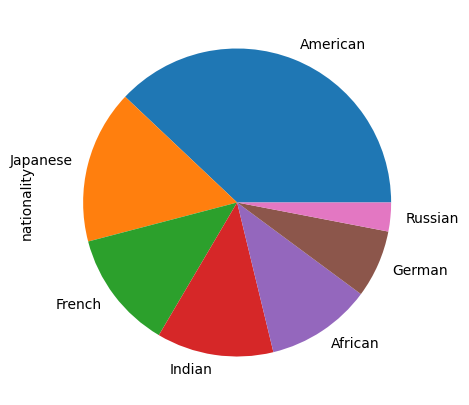

In [27]:
print(raw_data["nationality"].value_counts())
raw_data["nationality"].value_counts().plot(kind='pie', figsize=(5,5))

Female     2573
Male       1356
Neutral     766
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

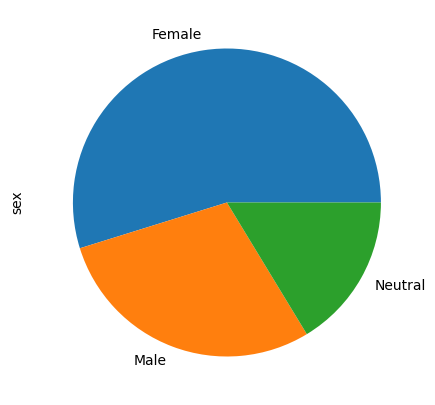

In [28]:
print(raw_data["sex"].value_counts())
raw_data["sex"].value_counts().plot(kind='pie', figsize=(5,5))

In [29]:
print(raw_data.loc[raw_data["nationality"]=="French"])

               name      sex nationality
2329           Aadi   Female      French
2330        Abelard     Male      French
2331       Abrielle   Female      French
2332         Acadia   Female      French
2333        Aceline   Female      French
2334         Adelie   Female      French
2335      Afrodille   Female      French
2336          Aimee   Female      French
2337          Aimon     Male      French
2338          Alain     Male      French
2339         Alaina   Female      French
2340      Albertine   Female      French
2341      Alexandre     Male      French
2342         Alezae   Female      French
2343         Aliane   Female      French
2344         Alizeé   Female      French
2345         Allete   Female      French
2346         Alodie   Female      French
2347       Alphonse     Male      French
2348        Alsatia   Female      French
2349       Amandine   Female      French
2350        Amarine   Female      French
2351          Ambre   Female      French
2352       Ambro